In [1]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
#平常圖有R、G、B三個channels，每個channels是一個矩陣，因為我們的圖是灰階，只有一個channel，
#要告訴keras(資料數,大資料數,大小,channel)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [3]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [4]:
#開始打造CNN
#決定做3次CONVOLUTIONAL每次接MAX-POOLING，FILTERS都3*3，MAX-POLLING都2*2。
#用CNN的小技巧ˇ是每層filters數目越來越多，做完convolutional後要拉平送入標準神經網路。
#CNN做完會變成多個矩陣，Keras用Flatten拉成向量
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

In [7]:
model = Sequential()
#Conv2D(filter個數,(大小3*3),padding輸出大小))，pool_size(選區大小2*2)，filter個數越來越多
#第一層
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#第二層
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#第三層
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
#輸出設定
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
#組裝mse(平均平方差),categorical crossentropy(分類問題常用)
model.compile(loss='mse',optimizer=SGD(lr=0.05),metrics=['accuracy'])

In [9]:
#檢視神經網路
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [10]:
#訓練
model.fit(x_train, y_train, batch_size=100, epochs=12)

Instructions for updating:
Use tf.cast instead.
Epoch 1/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1028 - acc: 0.4490
Epoch 2/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0067 - acc: 0.9557
Epoch 3/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0040 - acc: 0.9735
Epoch 4/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0030 - acc: 0.9812
Epoch 5/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0024 - acc: 0.9849
Epoch 6/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0020 - acc: 0.9878
Epoch 7/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0017 - acc: 0.9896
Epoch 8/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0014 - acc: 0.9912
Epoch 9/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0013 - acc: 0.9921
Epoch 10/12
60000/60000 [===========================

In [12]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 5s 494us/step


In [13]:
print('loss',score[0])
print('acc:',score[1])

loss 0.0019829261793325825
acc: 0.9877


In [14]:
#將神經網路存起來
model_json=model.to_json()
open('handwriting_model_cnn.json','w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

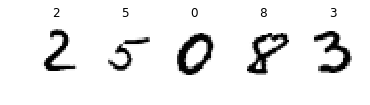

In [17]:
#檢視成果
predict = model.predict_classes(x_test)
pick = np.random.randint(1,9999,5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")